In [1]:
!(pip uninstall --no-input swagger-client && pip install --no-cache-dir ./stable-diffusion-api/clients/python)

Processing ./stable-diffusion-api/clients/python
  Created wheel for swagger-client: filename=swagger_client-1.0.0-py3-none-any.whl size=20907 sha256=2e7ff6c976dd2b23ef71b328724310e3d3d780f6caecaed0141116718b0a1c0a
  Stored in directory: /tmp/pip-ephem-wheel-cache-0jb16_it/wheels/86/b6/45/6250615cd33e5525b395b9e118a224c487728b70f726ecdc41
Successfully built swagger-client


In [ ]:
!pip install Pillow

In [2]:
import swagger_client
from swagger_client.rest import ApiException

config = swagger_client.Configuration()
config.host = 'http://localhost:5000'
config.api_key['Authorization'] = '<key>'
config.api_key_prefix['Authorization'] = 'Bearer'
api = swagger_client.DefaultApi(swagger_client.ApiClient(config))
inp = swagger_client.Txt2ImgInput(prompt='A corgi wearing a top hat, suit and monocle, oil painting')
try:
    output = api.txt2img(inp)
except ApiException as exc:
    print(exc)

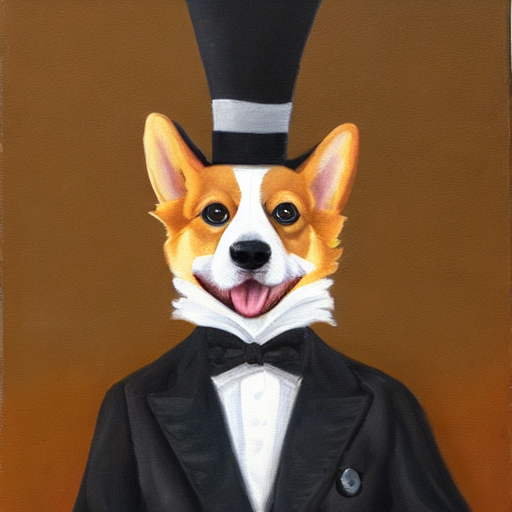

In [11]:
from base64 import b64decode
from io import BytesIO
from PIL import Image
from IPython.display import display


for iteration in output.iterations:
    for sample in iteration:
        img = Image.open(BytesIO(b64decode(sample['image']['base64'])))
        display(img)